In [1]:
# Start with a custom working directory
remotes::install_github("peeter-t2/digar.txts",lib="R_pckg/",upgrade="never")

* checking for file ‘/tmp/Rtmp8wz8Ye/remotes459c46fffbc2b/peeter-t2-digar.txts-b87e10a/DESCRIPTION’ ... OK
* preparing ‘digar.txts’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘digar.txts_0.0.0.9100.tar.gz’
Warning in sprintf(gettext(fmt, domain = domain), ...) :
  one argument not used by format 'invalid uid value replaced by that for user 'nobody''



Warning message in i.p(...):
“'lib = "R_pckg/"' is not writable”


ERROR: Error: Failed to install 'digar.txts' from GitHub:
  unable to install packages


In [3]:
#lisatakse vajalikud pakid
library(digar.txts,lib.loc="R_pckg/")
library(tidyverse)

Loading required package: data.table

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



In [4]:
all_issues <- get_digar_overview() #saame kõik olemasolevad lehed
#võtame neist välja ainult eestikeelsed
subset_ek <- all_issues %>%
            filter(language=="Estonian")

[1] "Issue metadata read"


## Failid

Searchterm on see sõna, mida tahad otsida.
<br>
Searchfile all saad panna sellele failile nime, kuhu tulemus salvestatakse
<br>
subset_ek on korpuse kõik eestikeelsed tekstid, kust sõna hakatakse otsima
<br>
Lemmatiseeritud tekstide jaoks on see 'searchtype="lemmas"
<br>
Lisage failinimesse, kas ta on omasõna või võõrsõna, nt absoluutne_voorsona.txt, täielik_omasona.txt
<br>
### NB! Kõigile otsingusõnadele lisada ette ja taha \\\b nagu allpool kujutatud. 
Nii välistatakse nt sellised juhud, et otsides sõna 'kamp' leitakse ka 'kampsun'

In [9]:
do_subset_search(searchterm="\\babsoluutne\\b", searchfile="absoluutne_voorsona.txt",subset_ek, searchtype="lemmas")
do_subset_search(searchterm="\\btäielik\\b", searchfile="täielik_omasona.txt",subset_ek, searchtype="lemmas")

## Iga aasta kohta sõnade arv
Kui wordcounts_per_year_est on olemas, siis pole vaja jooksutada.

In [5]:
meta <- get_subset_meta(subset_ek)
#siit leiame, mitu sõna iga aasta kohta oli ja salvestame selle muutujasse wordcounts
wordcounts <- meta %>% 
  group_by(year) %>% 
  summarise(words=sum(LogicalSectionTextWordCount))
fwrite(wordcounts,"wordcounts_per_year_est_uus.tsv",sep="\t")

Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c4f79a7e5' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c5bbfa1b7' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c407079a7' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c5fe8dda3' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c1fc7ae1a' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c3badd533' has size 0. Returning a NULL data.table.”
Warning message in data.table::fread(cmd = x, fill = T):
“File '/tmp/RtmpE6mKwl/file5a6c7a350011' has size 0. Returning a NULL data.table.”
Warning message in d

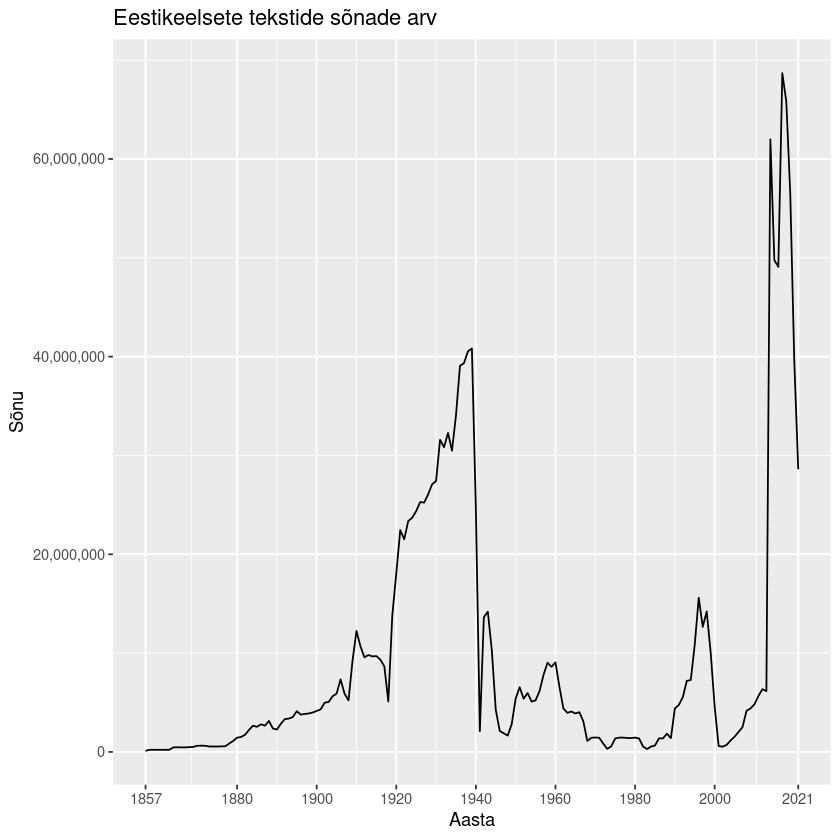

In [2]:
wordcounts <- read.table(file = 'wordcounts_per_year_est.tsv', sep = '\t', header = TRUE)
library(ggplot2)
ggplot(data=wordcounts, aes(x=year, y=words, group=1)) + #kust andmed, mis andmed on x ja mis y telg
    geom_line()+ #joongraagik
    labs( #muudame nimesid
        title = "Eestikeelsete tekstide sõnade arv",
        x = "Aasta",
        y = "Sõnu"
    ) +
    scale_x_continuous(breaks = c(1857, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2021)) + #ütleme, mis vahemik x teljel peab olema
    scale_y_continuous(labels = scales::comma)
ggsave("wordcounts.png", width = 1200, height = 1200, units = "px") #salvestame graafiku png failina

# Teeb üle kaustade eesti omasõnade ja ladinatüveliste võõrsõnade võrdlemiseks graafikud ja tabelid
## Siin plokis on eeltöö
Esimese rea jutumärkide juures saad muuta suure kausta nime, kust hiljem hakatakse alamkaustu välja võtma.

In [28]:
#jutumärkide vahele lisa kausta nimi, kus on alamkaustad iga sõnapaari/kolmiku jaoks
alamkaustad <- list.dirs("vaike", recursive = FALSE)
#nendesse salvestatakse sõnade mainimise arv aasta kaupa, et saaks pärast teha kõigi sõnade peale tabeli ja graafiku
aastad_kokku_oma <- c()
aastad_kokku_voor <- c()
#siin loetakse sisse, mitu sõna kõigi korpuse artiklite peale aasta kaupa oli
wordcounts <- read.table(file = 'wordcounts_per_year_est.tsv', sep = '\t', header = TRUE)
#siit saame listi kõikide korpuses olevate aastate kohta
koik_aastad <- wordcounts$year

## Siin plokis on tsükkel, mis tekitab iga mõiste kohta graafikud ja tabelid
Et see töötaks, on vaja teha kõigepealt üks suur kaust, nt 'ladina_tyved'. Seejärel saab lisada sinna alamkaustu. Ühes alamkaustas on ühe mõiste kohta käivad sõnad, mille failinimes peab avalduma, mis tüüpi sõnaga on tegu (kas eesti omasõna või ladina laen, nt 'absoluutne_voorsona.txt', 'täielik_omasona.txt'). Alamkausta nimi, kus need failid on, võiks kajastada kõiki neid sõnu (nt 'absoluutne_täielik'), sest kausta nimi muudetakse hiljem graafiku pealkirjaks.
<br>
### NB! Mõelge täpselt, kuhu tahate tulemusi salvestada. Minul näeb failipuu välja selline:
-kodu <br>
---- ladina_tyved (siin on kood) <br>
-------- graafikud <br>
-------- tabelid <br>
------------ normitud <br>
------------ tavalised <br>
-------- tekstid <br>
------------ absoluutne_täielik <br>
------------------ absoluutne_voorsona.txt <br>
------------------ täielik_omasona.txt <br>
<br>
Kui teil on samasugune failipuu, siis pole vaja koodis midagi muuta. Kui te aga tahaks midagi teisiti teha, otsi koodist sõna 'path' ja leiate kõik kohad, kus seda muuta saad. See keskkond arvestab koduks selle koha, kus kood on, nii et kui tahta nt, et fail salvestatakse kohta "kodu/ladina_tyved/graafikud", peab kirjutama pathiks ainult "graafikud". 

In [25]:
`%!in%` <- Negate(`%in%`)
for (kaust in alamkaustad) {
    if (grepl(".ipynb_checkpoints", kaust, fixed = TRUE)) {
        next
    }
    else{
        print(kaust)
        #listid normaliseeritud tulemuste lisamiseks
        omasona <- c() 
        voorsona <- c() 
        #listid normaliseerimata tulemuste lisamiseks
        omasona_tava <- c() 
        voorsona_tava <- c() 
        files <- list.files(path=kaust, pattern="*.txt", full.names=TRUE, recursive=FALSE)
        kaust_nimi <- basename(kaust) #ainult kaustanimi
        for (file in files) {
            fn <- basename(file)
            i <- 0 #teeme loenduri
            sonu <- c() #teeme tühja listi
            normitud <- c() #uus tühi list
            #muudame esinemised tabeliks, kus ühes tulbas on faili id ja teises tekst
            tabel <- fread(file,sep ="\t",quote="",fill=TRUE,header=FALSE)[,.(id=V1,txt=V2)]
            #paneme id'd eraldi listi
            ided <- tabel$id
            #võtame id'st aasta välja  
            aastad = as.numeric(gsub("[a-zöäüõA-ZÕÜÖÄ]+([0-9]{4}).+", "\\1", ided))
            #lisame selle sõna kõik aastad aastate kollektiivsesse listi vastavalt ta tüübile
            if (grepl("omasona", file, fixed = TRUE)) { #kui failinimes on omasona
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_oma <- append(aastad_kokku_oma, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_oma <- str_extract(fn, ".+[^_omasona.txt)]")
                    }
            if (grepl("voorsona", file, fixed = TRUE)) { #kui failinimes on voorsona
                #salvestame kollektiivsesse listi selle sõna aastad
                aastad_kokku_voor <- append(aastad_kokku_voor, aastad)
                #salvestame sõna nime uude muutujasse, et see pärast tabelis veerunimeks panna
                fn_voor <- str_extract(fn, ".+[^_voorsona.txt)]")
                    }
            sonu_aastate_kaupa <- table(aastad)
            for (aasta in koik_aastad) { #üle kõigi aastate, millest korpuses üldse tekste on
                i <- i+1 #lisame loendurile ühe
                if (aasta %in% aastad) { #kui sel aastal on ka mainitud meie uuritavat sõna
                    mitu_mainimist <- sonu_aastate_kaupa[[as.character(aasta)]] #leiab, mitu korda seda sõna sel aastal mainiti
                    sonu_aastas <- wordcounts[[2]][[i]] #mitu sõna ühe aasta tekstide peale kokku oli
                    norm <- (mitu_mainimist/sonu_aastas)*10000000 #jagame selle aasta sõna mainimise arvu selle aasta kollektiivsete sõnade arvuga ja korrutame konstandiga, et tulemus oleks loetavam
                    if (grepl("omasona", file, fixed = TRUE)) { #kui failinimes on omasona
                        omasona <- append(omasona, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                        omasona_tava <- append(omasona_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("voorsona", file, fixed = TRUE)) { #kui failinimes on voorsona
                        voorsona <- append(voorsona, norm) #lisab selle aasta sõna normitud mainimiste arvu listi
                        voorsona_tava <- append(voorsona_tava, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                    }
                }
                if (aasta %!in% aastad) { #kui sel aastal polnud ühtegi sõna mainimist
                    if (grepl("omasona", file, fixed = TRUE)) { #kui failinimes on omasona
                        omasona <- append(omasona, 0) #lisab selle aasta sõna mainimiste arvu listi
                        omasona_tava <- append(omasona_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                    if (grepl("voorsona", file, fixed = TRUE)) { #kui failinimes on voorsona
                        voorsona <- append(voorsona, 0) #lisab selle aasta sõna mainimiste arvu listi
                        voorsona_tava <- append(voorsona_tava, 0) #lisab selle aasta sõna mainimiste arvu listi
                    }
                }
            }
        }
        
        #tabeli salvestamiseks csv faili nimi ja kaust
        csv_nimi_norm <- paste(kaust_nimi, "tabel_norm.csv", sep="_")
        csv_nimi_norm_path <- paste("tabelid/normitud", csv_nimi_norm, sep="/")
        csv_nimi_tava <- paste(kaust_nimi, "tabel_tava.csv", sep="_")
        csv_nimi_tava_path <- paste("tabelid/tavalised", csv_nimi_tava, sep="/")
        #graafik
        colors <- c("Võõrsõna" = "red", "Omasõna" = "blue")
        graafikuks <- data.frame(koik_aastad, omasona, voorsona) #teeme ühe suure tabeli, kus on aastad, omasõna normitud arv ja võõrsõna normitud arv
        tabeliks <- data.frame(koik_aastad, omasona_tava, voorsona_tava) #teeme ühe suure tabeli, kus on aastad, eestindatud sõna arv ja võõrsõna  arv
        tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(omasona_tava), sum(voorsona_tava)) #lisame tabelisse veergude summad
        #muudame tabelite veerunimesid
        colnames(graafikuks) <- c('aasta',fn_oma, fn_voor)
        colnames(tabeliks) <- c('aasta',fn_oma, fn_voor) 
        #kirjutame tabelid csv faili
        write.csv(graafikuks, csv_nimi_norm_path, row.names = FALSE) 
        write.csv(tabeliks, csv_nimi_tava_path, row.names = FALSE) 
        #teeme normaliseeritud andmete põhjal graafiku
        graafik <- ggplot(graafikuks, aes(x=koik_aastad)) +
            geom_line(aes(y=omasona, color="Omasõna"), alpha = 0.4, size = 0.4) +
            geom_line(aes(y=voorsona, color="Võõrsõna"), alpha = 0.4, size = 0.4) +
            labs( #muudame nimesid
                title = kaust_nimi,
                x = "Aasta",
                y = "Mainimiste osakaal",
                color = "Legend"
            ) +
            scale_color_manual(values = colors) +
            scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
            theme(text = element_text(size = 8)) 
        graafik_nimi <- paste(kaust_nimi, "graafik.png", sep="_")
        #ggsave(graafik_nimi, path = "graafikud", width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
        }
    }

[1] "vaike/abstinents_kainus"
[1] "vaike/absurdne_jabur"
[1] "vaike/adapteeruma_kohanema"
[1] "vaike/administraator_haldur"
[1] "vaike/agiteerima_ässitama"
[1] "vaike/agoonia_surmaheitlus"
[1] "vaike/agressor_ründaja"
[1] "vaike/alias_varjunimi"
[1] "vaike/almus_armuand"
[1] "vaike/ambitsioon_auahnus"
[1] "vaike/ambivalentne_kaksipidine"
[1] "vaike/antiikne_vanaaegne"
[1] "vaike/apelleerimine_edasikaebamine"
[1] "vaike/aplodeerima_plaksutama"
[1] "vaike/argument_põhjendus"


# Kõigi eesti omasõnade ja ladina laenude peale kokku tabel ja graafik

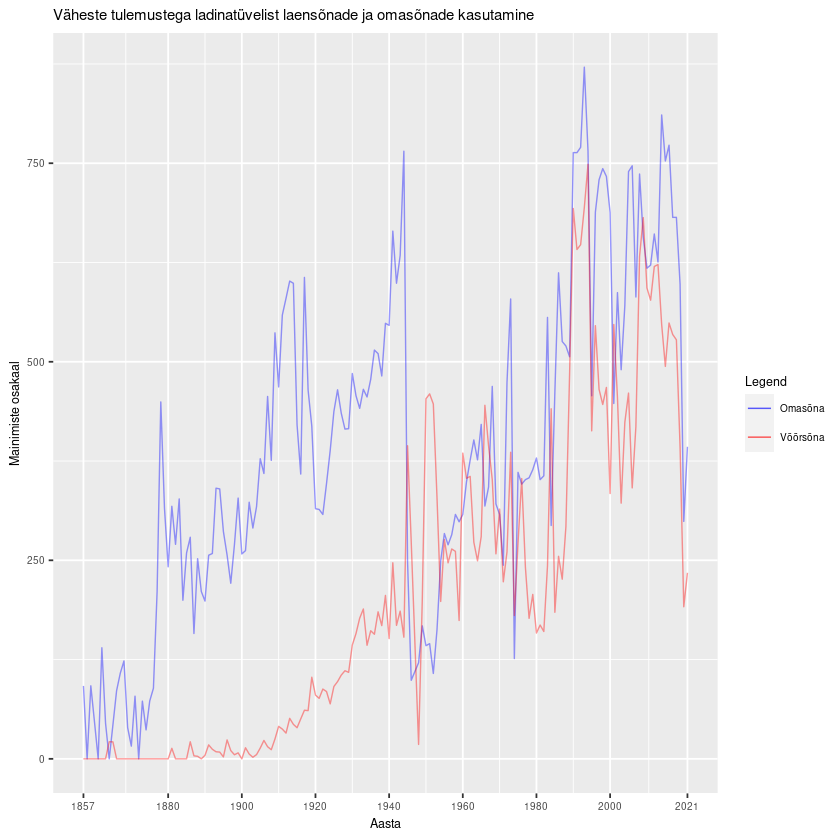

In [26]:
kokku_oma <- c()
kokku_voor <- c()
kokku_oma_norm <- c()
kokku_voor_norm <- c()
aastad_kokku_koik <- list(aastad_kokku_oma, aastad_kokku_voor)

i <- 0 #loendur
j <- 0 #loendur listide jaoks
for (jarjend in aastad_kokku_koik) {
    j <- j+1 #loendur listide jaoks
    i <- 0 #loendur
    sonu_aastate_kaupa <- table(jarjend)
    for (aasta in koik_aastad) { #üle kõigi aastate, millest korpuses üldse tekste on
        i <- i+1 #lisame loendurile ühe
        if (aasta %in% jarjend & aasta != 1947) { #kui sel aastal on ka mainitud meie uuritavat sõna
            mitu_mainimist <- sonu_aastate_kaupa[[as.character(aasta)]] #leiab, mitu korda seda sõna sel aastal mainiti
            sonu_aastas <- wordcounts[[2]][[i]] #mitu sõna ühe aasta tekstide peale kokku oli
            norm <- (mitu_mainimist/sonu_aastas)*10000000 #jagame selle aasta sõna mainimise arvu selle aasta kollektiivsete sõnade arvuga ja korrutame konstandiga, et tulemus oleks loetavam
            if (j == 1) { #kui omasona
                kokku_oma_norm<- append(kokku_oma_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_oma <- append(kokku_oma, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 2) { #kui võõrsõna
                kokku_voor_norm <- append(kokku_voor_norm, norm) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_voor <- append(kokku_voor, mitu_mainimist) #lisab selle aasta sõna mainimiste arvu listi
                }
            }
        if (aasta %!in% jarjend & aasta != 1947) { #kui sel aastal polnud ühtegi sõna mainimist
            if (j == 1) { #kui omasona
                kokku_oma_norm<- append(kokku_oma_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_oma <- append(kokku_oma, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            if (j == 2) { #kui võõrsõna
                kokku_voor_norm <- append(kokku_voor_norm, 0) #lisab selle aasta normitud sõna mainimiste arvu listi
                kokku_voor <- append(kokku_voor, 0) #lisab selle aasta sõna mainimiste arvu listi
                }
            }
        }
    }
colors <- c("Omasõna" = "blue", "Võõrsõna" = "red")
graafikuks <- data.frame(koik_aastad, kokku_oma_norm, kokku_voor_norm) #teeme ühe suure tabeli, kus on aastad, omasõna normitud arv ja võõrsõna normitud arv
tabeliks <- data.frame(koik_aastad, kokku_oma, kokku_voor) #teeme ühe suure tabeli, kus on aastad, omasõna arv ja võõrsõna arv
tabeliks[nrow(tabeliks) + 1,] = c("Summa",sum(kokku_oma), sum(kokku_voor)) #lisame tabelisse veergude summad
#kirjutame tabeli csv faili
write.csv(graafikuks, "kokku_normaliseeritud_tabel.csv", row.names = FALSE) 
write.csv(tabeliks, "kokku_tabel.csv", row.names = FALSE) 
#teeme normaliseeritud andmete põhjal graafiku
graafik <- ggplot(graafikuks, aes(x=koik_aastad)) +
    geom_line(aes(y=kokku_oma_norm, color="Omasõna"), alpha = 0.4, size = 0.4) +
    geom_line(aes(y=kokku_voor_norm, color="Võõrsõna"), alpha = 0.4, size = 0.4) +
    labs( #muudame nimesid
        title = "Väheste tulemustega ladinatüvelist laensõnade ja omasõnade kasutamine",
        x = "Aasta",
        y = "Mainimiste osakaal",
        color = "Legend"
        ) +
    scale_color_manual(values = colors) + 
    scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) #ütleme, mis vahemik x teljel peab olema
graafik + theme(text = element_text(size = 7.5))  
ggsave("vaike_kokku_graafik.png", width = 1500, height = 800, units = "px") #salvestame graafiku png failina

## Väljaanded
Siin plokis uuritakse, mis väljaannetest iga sõna tekstid pärit on ja tehakse nende illustreerimiseks graafik. Soovitan need eraldi kausta salvestada, minul on selleks kaustaks nt 'valjaanded'. Kui soovite seda muuta, siis viimasel koodireal ggsave all on 'path', mille väärtust saab muuta. Kui see 'path' alamosa eemaldada, salvestatakse graafikud kodukausta

In [6]:
alamkaustad <- list.dirs("suur", recursive = FALSE)
for (kaust in alamkaustad) {
    if (grepl(".ipynb_checkpoints", kaust, fixed = TRUE)) {
        next
    }
    else{
        files <- list.files(path=kaust, pattern="*.txt", full.names=TRUE, recursive=FALSE)
        kaust_nimi <- basename(kaust) #ainult kaustanimi
        for (file in files) { 
            fn <- str_extract(basename(file), ".+[^.txt)]")
            print(fn)
            tabel <- fread(file,sep ="\t",quote="",fill=TRUE,header=FALSE)[,.(id=V1,txt=V2)]
            #If texts don't have the metainfo attached, it is possible to extract it from the id.
            counts <- tabel %>%
              mutate(pubid=str_extract(id,"[a-zõäöü]+")) %>%  # Extract the publication name.
              mutate(year=str_extract(id,"[0-9]{4}")) %>% # Extract the publication year.
              count(pubid,year)

            # Count the number of times a publication occurs, to get the most popular ones.
            pubs <- counts %>% 
              group_by(pubid) %>% 
              summarise(sum=sum(n)) %>% 
              arrange(desc(sum))

            # Keep the names only if they are the among the 9 most common ones, name the others "other".
            pubs_colors <- pubs %>% 
              mutate(rownr=row_number()) %>% 
              mutate(color=ifelse(rownr<5,yes=paste0(pubid,rownr),no="other"))
  
            # Make a geom_col plot of the distribution over time.
            counts %>% 
              left_join(pubs_colors,by="pubid") %>% 
              ggplot(aes(x=as.numeric(year),y=n,fill=factor(color)))+
              geom_col() +
              labs( #muudame nimesid
                title = fn,
                x = "Aasta",
                y = "Mainimiste arv",
                color = "Väljaanne"
              ) +
              scale_x_continuous(limits = c(1857, 2021), breaks=c(1857,1880,1900,1920,1940,1960,1980,2000,2021)) + #ütleme, mis vahemik x teljel peab olema
              theme(text = element_text(size = 8)) 
            graafik_nimi <- paste(fn, "graafik.png", sep="_")
            ggsave(graafik_nimi, path = "valjaanded", width = 1500, height = 800, units = "px") #salvestame graafiku png failina 
            }
        }
    }

[1] "absoluutne_voorsona"


Warning message:
“Removed 32 rows containing missing values (geom_col).”


[1] "täielik_omasona"


Warning message:
“Removed 64 rows containing missing values (geom_col).”


[1] "aktiivne_voorsona"


Warning message:
“Removed 79 rows containing missing values (geom_col).”


[1] "toimekas_omasona"


Warning message:
“Removed 27 rows containing missing values (geom_col).”


[1] "aktuaalne_voorsona"


Warning message:
“Removed 53 rows containing missing values (geom_col).”


[1] "päevakajaline_omasona"


Warning message:
“Removed 31 rows containing missing values (geom_col).”


[1] "abiline_omasona"


Warning message:
“Removed 39 rows containing missing values (geom_col).”


[1] "assistent_voorsona"


Warning message:
“Removed 30 rows containing missing values (geom_col).”


### Omasõnade ja võõrsõnade peale kokku väljaanded

[1] "abiline_omasona"
[1] "armuand_omasona"
[1] "ässitama_omasona"
[1] "auahnus_omasona"
[1] "edasikaebamine_omasona"
[1] "enampakkumine_omasona"
[1] "haldur_omasona"
[1] "jabur_omasona"
[1] "kainus_omasona"
[1] "kaitsja_omasona"
[1] "kaksipidine_omasona"
[1] "kohanema_omasona"
[1] "nõustuma_omasona"
[1] "päevakajaline_omasona"
[1] "päevakord_omasona"
[1] "plaksutama_omasona"
[1] "põhjendus_omasona"
[1] "ründaja_omasona"
[1] "surmaheitlus_omasona"
[1] "täielik_omasona"
[1] "täpne_omasona"
[1] "toimekas_omasona"
[1] "vägivaldne_omasona"
[1] "vanaaegne_omasona"
[1] "varjunimi_omasona"


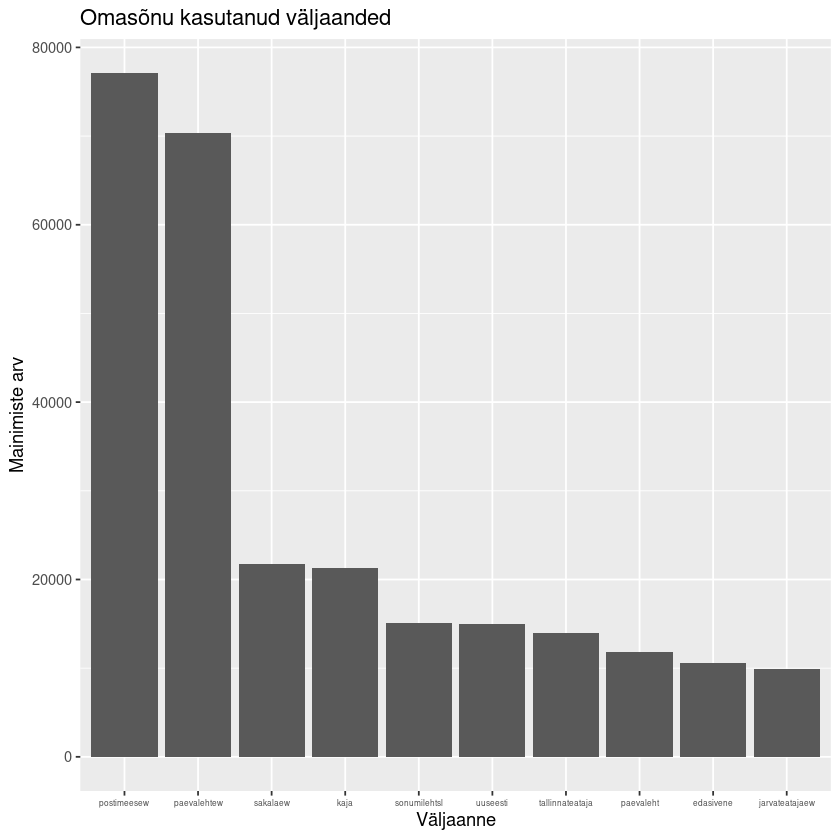

In [90]:
pubid_kokku <- c()
files <- list.files(path="omasonad", pattern="*.txt", full.names=TRUE, recursive=FALSE)
kaust_nimi <- basename(kaust) #ainult kaustanimi
for (file in files) { 
    fn <- str_extract(basename(file), ".+[^.txt)]")
    print(fn)
    tabel <- fread(file,sep ="\t",quote="",fill=TRUE,header=FALSE)[,.(id=V1,txt=V2)]
    pubid = str_extract(tabel$id,"[a-zõäöü]+") # Extract the publication name.
    pubid_kokku <- append(pubid_kokku, pubid)
    }
top10 <- sort(table(pubid_kokku),decreasing=TRUE)[1:10]

pk <- data.frame(top10)

# Make a geom_col plot of the distribution over time.
graph <- ggplot(pk, aes(x=pubid_kokku, y=Freq))+
    geom_col() +
    labs( #muudame nimesid
        title = "Omasõnu kasutanud väljaanded",
        x = "Väljaanne",
        y = "Mainimiste arv",
        )
graph + theme(axis.text.x = element_text(size = 5))
ggsave("omasona_valjaanded.png", width = 1500, height = 800, units = "px") #salvestame graafiku png failina 